In [16]:
%load_ext autoreload
%autoreload 2

import sys
import os
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

# Get the project's root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Go up one level

# Add the project root to sys.path
if project_root not in sys.path:
    sys.path.append(project_root)

# Import the project's modules
from figure_manager import FigureManager
# from figure_manager import create_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load data

In [40]:
# load data
data = pl.read_csv('Males.csv')
data.select(pl.mean(pl.col('wage')))

TypeError: invalid input for `col`

Expected `str` or `DataType`, got 'Expr'.

In [96]:
def create_plot(df, x_col: str, y_col: str, plot_method: str = 'plot', group_cols=None, agg_func=None, ax: plt.Axes = None, plot_kwargs: dict = None, **kwargs) -> plt.Axes:
    # Convert group_cols to list if it is a string
    if isinstance(group_cols, str):
        group_cols = [group_cols]

    # Create a new figure and axis if ax is not provided
    if ax is None:
        fig, ax = plt.subplots()

    # Grouping and aggregating data if group_cols and agg_func are provided
    if agg_func:
        over = [x_col] + (group_cols or [])
        df = df.group_by([x_col] + (group_cols or [])).agg(agg_func(y_col).alias(y_col)).sort(over)

    # Extracting data from the DataFrame
    plot_func = getattr(ax, plot_method)
    
    if group_cols:
        for group_name, group_data in df.group_by(group_cols):
            x = group_data[x_col].to_list()
            y = group_data[y_col].to_list()
            plot_func(x, y, label=group_name, **(plot_kwargs or {}))
    else:
        x = df[x_col].to_list()
        y = df[y_col].to_list()
        plot_func(x, y, **(plot_kwargs or {}))

    # Adding labels and title
    ax.set_xlabel(kwargs.get('xlabel', x_col))
    ax.set_ylabel(kwargs.get('ylabel', y_col))
    ax.set_title(kwargs.get('title', f'{plot_method.capitalize()} of {y_col} by {x_col}'))
    if group_cols or 'label' in kwargs:
        ax.legend()

    # Return the axis
    return ax


<Axes: title={'center': 'Average Wage by Experience and Residence'}, xlabel='Experience', ylabel='Wage'>

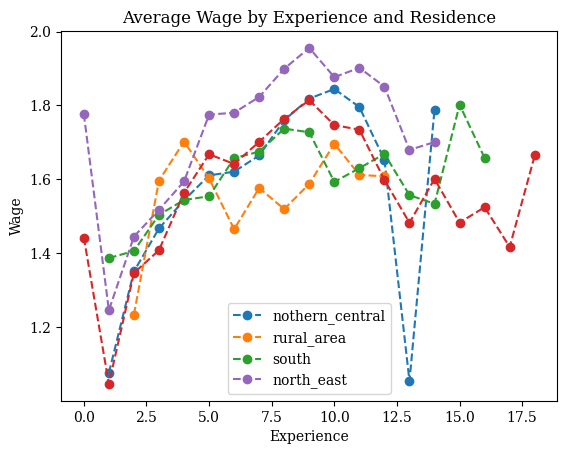

In [ ]:
create_plot(data, x_col='exper', y_col='wage', plot_method='plot', group_cols='residence', agg_func=pl.mean, xlabel='Experience', ylabel='Wage', title='Average Wage by Experience and Residence', plot_kwargs={'marker': 'o', 'linestyle': '--'})

Saved full figure to figures/final_figure.pdf
Saved subplot to figures/final_figure_subplot_1.pdf
Saved subplot to figures/final_figure_subplot_2.pdf


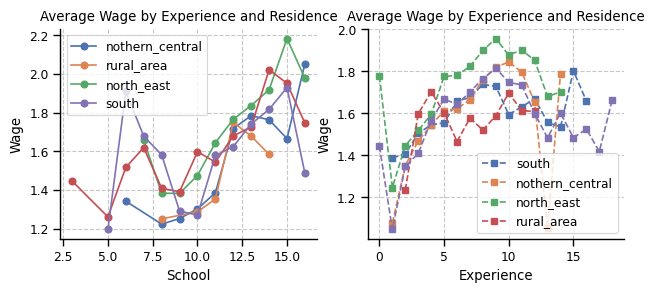

In [105]:
# Set up the FigureManager
fm = FigureManager(output_dir="figures/", paper_size="A4", file_ext=".pdf", use_latex=False)

# Create figure and subplot managers with specified layout
fig, axes = fm.create_figure(n_rows=1, n_cols=2, n_subplots=2)

# Example: Add some dummy plots
for i, ax in enumerate(axes):
    ax.plot([1, 2, 3], [i+1, (i+1)*2, (i+1)*3], label=f"Line {i+1}")
    ax.plot([1, 2, 3], [i*2+1, (i*2+1)*2, (i*2+1)*3], label=f"Line {i*2+1}")
    ax.set_xlabel(r"x (units)")  # LaTeX syntax
    ax.set_ylabel(r"y (units)")
    ax.legend()
axes[0] = create_plot(data, x_col='school', y_col='wage', plot_method='plot', group_cols='residence', agg_func=pl.mean, ax = axes[0], xlabel='School', ylabel='Wage', title='Average Wage by Experience and Residence', plot_kwargs={'marker': 'o', 'linestyle': '-'})
axes[1] = create_plot(data, x_col='exper', y_col='wage', plot_method='plot', group_cols='residence', agg_func=pl.mean, ax = axes[1], xlabel='Experience', ylabel='Wage', title='Average Wage by Experience and Residence', plot_kwargs={'marker': 's', 'linestyle': '--'})

# Save the entire figure and subplots
fm.save_figure(filename="final_figure")

# Optional: Display the figure
plt.show()

In [99]:
#check available styles in seaborn and print in list
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
